In [1]:
import pandas as pd
import numpy as np

In [2]:
sharks = pd.read_csv(r'/Users/martin/desktop/csv/attacks.csv', engine = 'python', sep = ',')

In [3]:
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
sharks.shape

(25723, 24)

In [5]:
sharks.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [6]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
len(sharks.columns)

24

In [8]:
#se compara las filas totales y los filas vacias en Unnamed: 22,
#por lo que la diferencia son de 1 fila con información.
#cuenta Valores unicos de 'Unnamed 22' 
sharks['Unnamed: 22'].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

In [9]:
#se compara las filas totales y los filas vacias en Unnamed: 23,
#por lo que la diferencia son de 2 fila con información.
#cuenta Valores unicos de 'Unnamed 23' 
sharks['Unnamed: 23'].value_counts()

change filename    1
Teramo             1
Name: Unnamed: 23, dtype: int64

In [10]:
#Se elimina la columna 'Unnamed: 22' ya que solo tiene dos filas con datos.
sharks.drop(['Unnamed: 22'], axis=1, inplace = True)

In [11]:
#Se elimina la columna 'Unnamed: 23' ya que solo tiene dos filas con datos.
sharks.drop(['Unnamed: 23'], axis=1, inplace = True)

In [12]:
len(sharks.columns)

22

In [13]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [14]:
#Verificar si las columnas son identicas
sharks['Case Number.1'].equals(sharks['Case Number.2'])

False

In [15]:
#Verificar si las columnas son identicas
sharks['Case Number'].equals(sharks['Case Number.1'])

False

In [16]:
#Verificar que tan identicas son las columnas Case Number.1 y Case Number.2
sharks['Case Number.1'].isin(sharks['Case Number.2']).value_counts()

True     25704
False       19
Name: Case Number.1, dtype: int64

In [17]:
#al parecer tienen 25704 columnas identicas, por lo que se puede eliminar
#una de las dos, eliminaremos Case NUmber.2
sharks.drop(['Case Number.2'], axis=1, inplace = True)

In [18]:
#Verificar que tan identicas son las columnas Case Number y Case Number.1
sharks['Case Number'].isin(sharks['Case Number.1']).value_counts()

True     23299
False     2424
Name: Case Number, dtype: int64

In [19]:
#Al parecer tienen 23299 columnas identicas (parece que Case Number es la 
#columna de origen,por lo que se puede eliminar una de las dos, 
#eliminaremos Case NUmber.1
sharks.drop(['Case Number.1'], axis=1, inplace = True)

In [20]:
#Verificar si las columnas son identicas
sharks['href formula'].equals(sharks['href'])

False

In [21]:
#Verificar que tan identicas son las columnas Case Number y Case Number.1
sharks['href formula'].isin(sharks['href']).value_counts()

True     25664
False       59
Name: href formula, dtype: int64

In [22]:
#al parecer tienen 25664 columnas identicas, por lo que se puede eliminar
#una de las dos, eliminaremos href
sharks.drop(['href'], axis=1, inplace = True)

In [23]:
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0


In [24]:
#Vemos que pdf contiene el nombre del archivo, pero tenemos la dirección del correo
#electrónico en href formula, por lo que se puede eliminar
sharks.drop(['pdf'], axis=1, inplace = True)

In [25]:
#Vemos que Investigator or Source esta relacionado con href formula,
#ahí podremos encontrar la fuente, por lo que se puede eliminar
sharks.drop(['Investigator or Source'], axis=1, inplace = True)

In [26]:
sharks['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [27]:
len(sharks['Fatal (Y/N)'].unique())

9

In [28]:
#Reemplazando valores de Fatal (Y/N)
sharks['Fatal (Y/N)'].replace(['nan', 'M', 'UNKNOWN', '2017'], np.nan, inplace = True)
sharks['Fatal (Y/N)'].replace(['y'], 'Y', inplace=True)
sharks['Fatal (Y/N)'].replace([' N', 'N '], 'N', inplace=True)

In [29]:
len(sharks['Fatal (Y/N)'].unique())

3

In [30]:
sharks['Fatal (Y/N)'].value_counts()

N    4301
Y    1389
Name: Fatal (Y/N), dtype: int64

In [31]:
#Vemos que Injury esta relacionado con Fatal (Y/N,
#por lo que se puede eliminar
sharks.drop(['Injury'], axis=1, inplace = True)

In [32]:
sharks['Sex '].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [33]:
sharks.rename(columns={'Sex ': 'Sex'}, inplace=True)

In [34]:
len(sharks['Sex'].unique())

7

In [35]:
#Reemplazando valores de Sex
sharks['Sex'].replace(['nan', 'lli', 'N', '.'], np.nan, inplace = True)
sharks['Sex'].replace(['M '], 'M', inplace = True)

In [36]:
len(sharks['Sex'].unique())

3

In [37]:
sharks['Sex'].unique()

array(['F', 'M', nan], dtype=object)

In [38]:
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Fatal (Y/N),Time,Species,href formula,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,N,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,11,N,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,N,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,N,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,N,NaN,"Tiger shark, 3m",http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0


In [39]:
#Se decide quitar las siguientes columnas por ser datos que no aportan algo al analísis
sharks.drop(['original order'], axis=1, inplace = True)
sharks.drop(['Time'], axis=1, inplace = True)
sharks.drop(['Name'], axis=1, inplace = True)
sharks.drop(['Location'], axis=1, inplace = True)


In [40]:
len(sharks['Age'].unique())

158

In [41]:
sharks['Age'].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '� ', ' ', '30 or 36', '6�', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
     

In [42]:
#Se decide quitar esta columna por tener muchos datos unicos, 
#creó que debe de tener una longitud de 60 aproximadamente 
sharks.drop(['Age'], axis=1, inplace = True)

In [43]:
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Activity,Sex,Fatal (Y/N),Species,href formula
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,Paddling,F,N,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,Standing,F,N,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,Surfing,M,N,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,M,N,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,Free diving,M,N,"Tiger shark, 3m",http://sharkattackfile.net/spreadsheets/pdf_di...


In [44]:
sharks['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [45]:
#Hacemos mayúsculas las letras
sharks['Country'] = sharks['Country'].str.strip().str.upper()

In [46]:
sharks['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'FIJI', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ITALY',
       'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITED ARAB E

In [47]:
sharks['Country'] = sharks['Country'].str.replace('\+|a|b|\-|', '')

In [48]:
sharks['Country'] = sharks['Country'].str.replace('\?|CEYLON|(|)', '')

In [49]:
sharks['Country'].value_counts()[:20]

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                90
ITALY                 71
FIJI                  65
PHILIPPINES           62
REUNION               60
NEW CALEDONIA         53
CUBA                  46
MOZAMBIQUE            45
SPAIN                 44
INDIA                 40
EGYPT                 40
JAPAN                 34
CROATIA               34
Name: Country, dtype: int64

In [50]:
sharks['Year'].unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [51]:
sharks['Year'].value_counts()

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1753.0      1
77.0        1
1785.0      1
1580.0      1
1543.0      1
Name: Year, Length: 249, dtype: int64

In [52]:
sharks.isnull()

,Case Number,Date,Year,Type,Country,Area,Activity,Sex,Fatal (Y/N),Species,href formula
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
25718,True,True,True,True,True,True,True,True,True,True,True
25719,True,True,True,True,True,True,True,True,True,True,True
25720,True,True,True,True,True,True,True,True,True,True,True
25721,True,True,True,True,True,True,True,True,True,True,True


In [53]:
sharks.loc[sharks['Case Number'].isnull()]

,Case Number,Date,Year,Type,Country,Area,Activity,Sex,Fatal (Y/N),Species,href formula
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,Fishing,M,N,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#borrando filas que no tienen información
sharks.drop(range(8702,25723), axis = 0, inplace = True)

In [55]:
sharks

,Case Number,Date,Year,Type,Country,Area,Activity,Sex,Fatal (Y/N),Species,href formula
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,Paddling,F,N,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,Standing,F,N,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,Surfing,M,N,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,M,N,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,Free diving,M,N,"Tiger shark, 3m",http://sharkattackfile.net/spreadsheets/pdf_di...
...,...,...,...,...,...,...,...,...,...,...,...
8697,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
sharks.loc[sharks['Case Number'] == '0']

,Case Number,Date,Year,Type,Country,Area,Activity,Sex,Fatal (Y/N),Species,href formula
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8697,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#Se eliminan filas donde valen 0 en Case Number
sharks.drop(range(6302,8702), axis = 0, inplace = True)

In [58]:
sharks

,Case Number,Date,Year,Type,Country,Area,Activity,Sex,Fatal (Y/N),Species,href formula
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,Paddling,F,N,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,Standing,F,N,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,Surfing,M,N,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,M,N,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,Free diving,M,N,"Tiger shark, 3m",http://sharkattackfile.net/spreadsheets/pdf_di...
...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Diving,M,Y,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Pearl diving,M,Y,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Swimming,M,Y,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,NaN,M,Y,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [59]:
import matplotlib.pyplot as plt

# Insights


Los ataques fueron fatales solo en el 24% de los casos.

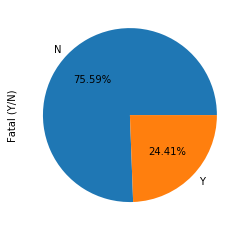

In [60]:
sharks['Fatal (Y/N)'].value_counts().head().plot(kind = 'pie',autopct='%1.2f%%');

Genero de los ataques: el 88% fueron en hombres

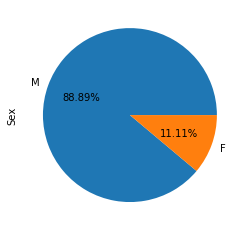

In [61]:
sharks['Sex'].value_counts().head().plot(kind = 'pie',autopct='%1.2f%%');

Paises con más ataques: Usa, Austalia y Sudafrica

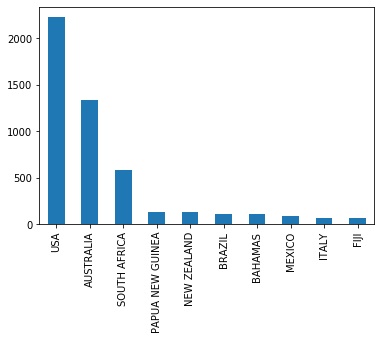

In [62]:
sharks['Country'].value_counts().head(10).plot(kind = 'bar');

Los años con más ataques fueron 2015, 2017 y 2016

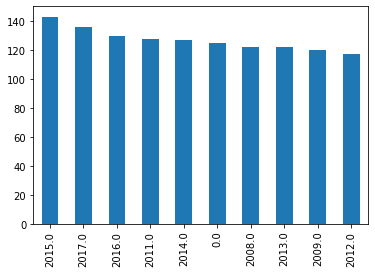

In [63]:
sharks['Year'].value_counts().head(10).plot(kind = 'bar');